In [51]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
def cleany(tweet):
    tweet = re.sub('@\S+','', tweet)
    tweet = re.sub('\^\S+','', tweet)
    tweet = re.sub('https:\S+','', tweet)
    return tweet.lower()

In [30]:
def find_sig(tw):
    if re.search('\^\S{1,4}', tw) != None:
        return re.search('\^\S{1,4}', tw)[0]
    else:
        return None

In [230]:
def df_import(path):
    df = pd.read_excel(path, error_bad_lines=False)
    df = df[df.text.notnull()]
    print('clean')
    df['tweet_clean'] = df.text.map(cleany)
    print('polarity')
    df['polarity'] = df.tweet_clean.map(lambda x: TextBlob(x).sentiment.polarity)
    print('subj')
    df['subjectivity'] = df.tweet_clean.map(lambda x: TextBlob(x).sentiment.subjectivity)
    print('sig')
    df['sig'] = df.text.map(find_sig)
    df['log_rt'] = df['retweets'].map(lambda x: 0 if x == 0 else np.log(x))
    df['log_faves'] = df['favorites'].map(lambda x: 0 if x == 0 else np.log(x))
    return(df)

In [231]:
df2 = df_import('GetOldTweets-python-master/tweets_test_2.xlsx')

clean
polarity
subj
sig


In [233]:
df1 = df_import('GetOldTweets-python-master/tweets_test.xlsx')

clean
polarity
subj
sig


In [237]:
df2.columns

Index(['date', 'retweets', 'favorites', 'text', 'geo', 'mentions', 'hashtags',
       'id', 'permalink', 'tweet_clean', 'polarity', 'subjectivity', 'sig',
       'log_rt', 'log_faves'],
      dtype='object')

In [238]:
df1.columns

Index(['date', 'retweets', 'favorites', 'text', 'geo', 'mentions', 'hashtags',
       'id', 'permalink', 'Unnamed: 9', 'tweet_clean', 'polarity',
       'subjectivity', 'sig', 'log_rt', 'log_faves'],
      dtype='object')

In [240]:
df1.drop(['geo','Unnamed: 9'], axis=1, inplace=True)

In [244]:
df2.drop(['geo'], axis=1, inplace=True)

In [242]:
df1.isnull().sum()

date                 0
retweets             0
favorites            0
text                 0
mentions        100019
hashtags         91961
id                   1
permalink            0
tweet_clean          0
polarity             0
subjectivity         0
sig              27324
log_rt               0
log_faves            0
dtype: int64

In [246]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101291 entries, 0 to 101299
Data columns (total 14 columns):
date            101291 non-null datetime64[ns]
retweets        101291 non-null int64
favorites       101291 non-null int64
text            101291 non-null object
mentions        1272 non-null object
hashtags        9330 non-null object
id              101290 non-null float64
permalink       101291 non-null object
tweet_clean     101291 non-null object
polarity        101291 non-null float64
subjectivity    101291 non-null float64
sig             73967 non-null object
log_rt          101291 non-null float64
log_faves       101291 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 11.6+ MB


In [247]:
df = pd.concat([df1,df2])

In [248]:
df.shape

(149091, 14)

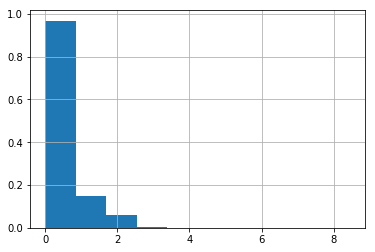

In [249]:
df.log_faves.hist(density=True)

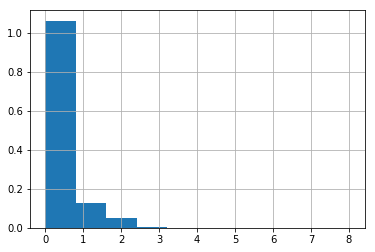

In [250]:
df.log_rt.hist(density=True)

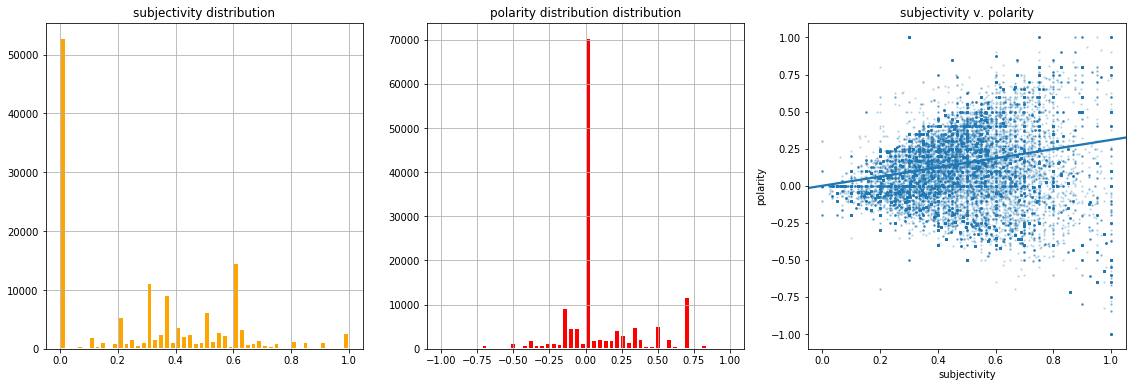

In [251]:
# all data
data = df
a = 0.3

plt.figure(figsize=(15,6))
plt.subplot(131)

plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                wspace=None, hspace=None)

data.subjectivity.hist(bins=50, color='Orange', ec='white', lw=2)
plt.title(s='subjectivity distribution')

plt.subplot(132)
data.polarity.hist(bins=50, color='Red', ec='white', lw=2)
plt.title(s='polarity distribution distribution')

plt.subplot(133)
sns.regplot(data=data, x='subjectivity' , y='polarity', scatter_kws={'alpha':0.2, 's':2})
plt.title(s='subjectivity v. polarity');

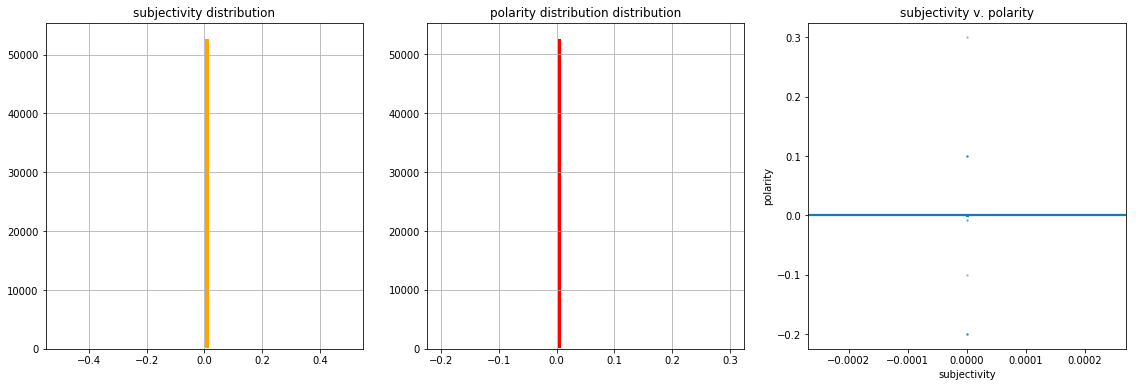

In [252]:
# subj = 0
data = df[df['subjectivity'] == 0]
a = 0.3

plt.figure(figsize=(15,6))
plt.subplot(131)

plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                wspace=None, hspace=None)

data.subjectivity.hist(bins=50, color='Orange', ec='white', lw=2)
plt.title(s='subjectivity distribution')

plt.subplot(132)
data.polarity.hist(bins=50, color='Red', ec='white', lw=2)
plt.title(s='polarity distribution distribution')

plt.subplot(133)
sns.regplot(data=data, x='subjectivity' , y='polarity', scatter_kws={'alpha':0.2, 's':2})
plt.title(s='subjectivity v. polarity');

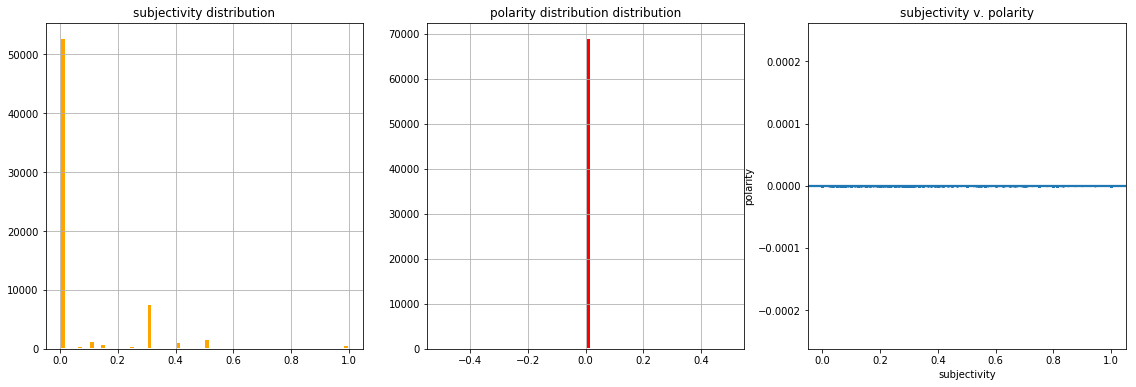

In [253]:
# polarity = 0
data = df[df['polarity'] == 0]
a = 0.3

plt.figure(figsize=(15,6))
plt.subplot(131)

plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                wspace=None, hspace=None)

data.subjectivity.hist(bins=50, color='Orange', ec='white', lw=2)
plt.title(s='subjectivity distribution')

plt.subplot(132)
data.polarity.hist(bins=50, color='Red', ec='white', lw=2)
plt.title(s='polarity distribution distribution')

plt.subplot(133)
sns.regplot(data=data, x='subjectivity' , y='polarity', scatter_kws={'alpha':0.2, 's':2})
plt.title(s='subjectivity v. polarity');

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


<Container object of 83 artists>

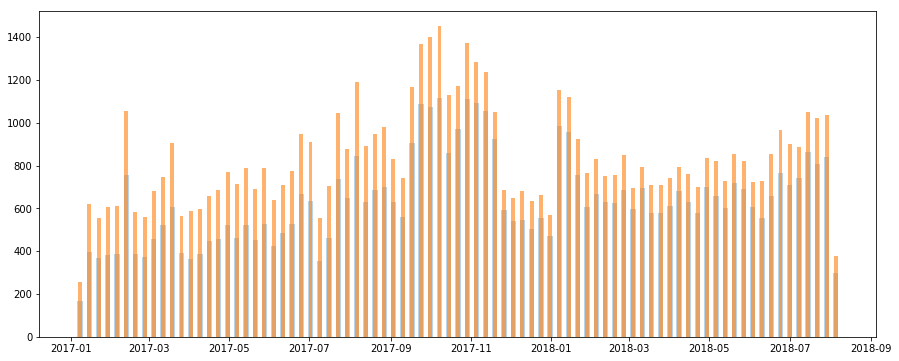

In [254]:
# subj = 0 tweets over time
data1 = df[df['subjectivity'] == 0].set_index('date').resample('W', how='count').reset_index()
x1 = data1['date']
h1 = data1['retweets']

data2 = df[df['polarity'] == 0].set_index('date').resample('W', how='count').reset_index()
x2 = data2['date']
h2 = data2['retweets']

plt.figure(figsize=(15,6))
plt.bar(data=data1, height=h1, x=x1, alpha=0.3, width=4)
plt.bar(data=data2, height=h2, x=x2, alpha=0.6, width=3)

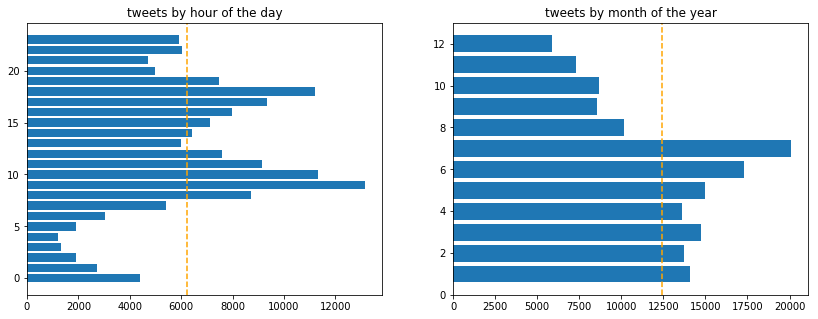

In [255]:
plt.figure(figsize=(14,5))

plt.subplot(121)
data = df.groupby(df.date.dt.hour).count().drop('date', axis=1).reset_index()[['date','retweets']].rename(
    columns={'date':'hour', 'retweets':'tweets'})

plt.barh(data=data, y='hour', width='tweets')
plt.axvline(x=data.tweets.mean(), linestyle='--', color='orange')
plt.title(s='tweets by hour of the day')

plt.subplot(122)
data = df.groupby(df.date.dt.month).count().drop('date', axis=1).reset_index()[['date','retweets']].rename(
    columns={'date':'month', 'retweets':'tweets'})

plt.barh(data=data, y='month', width='tweets')
plt.axvline(x=data.tweets.mean(), linestyle='--', color='orange')
plt.title(s='tweets by month of the year');

In [214]:
df.set_index('date')[['retweets', 'text']].resample('D', how='count').rolling(5, on='retweets').mean().reset_index().rename(columns={'retweets':'tweets', 'text':'rolling_avg'})

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


date  tweets  rolling_avg
0   2017-08-03     418          NaN
1   2017-08-04     483          NaN
2   2017-08-05     267          NaN
3   2017-08-06     169          NaN
4   2017-08-07     263        320.0
5   2017-08-08     300        296.4
6   2017-08-09     355        270.8
7   2017-08-10     387        294.8
8   2017-08-11     337        328.4
9   2017-08-12     182        312.2
10  2017-08-13     119        276.0
11  2017-08-14     221        249.2
12  2017-08-15     284        228.6
13  2017-08-16     395        240.2
14  2017-08-17     349        273.6
15  2017-08-18     402        330.2
16  2017-08-19     224        330.8
17  2017-08-20     239        321.8
18  2017-08-21     237        290.2
19  2017-08-22     429        306.2
20  2017-08-23     520        329.8
21  2017-08-24     350        355.0
22  2017-08-25     342        375.6
23  2017-08-26     247        377.6
24  2017-08-27     161        324.0
25  2017-08-28     272        274.4
26  2017-08-29     277        259.8
27  2017-08-30     258        243.0
28  2017-08-31     286        250.8
29  2017-09-01     301        278.8
..         ...     ...          ...
334 2018-07-03     475        377.4
335 2018-07-04     204        339.8
336 2018-07-05     388        363.0
337 2018-07-06     322        376.8
338 2018-07-07     291        336.0
339 2018-07-08     184        277.8
340 2018-07-09     435        324.0
341 2018-07-10     398        326.0
342 2018-07-11     456        352.8
343 2018-07-12     454        385.4
344 2018-07-13     473        443.2
345 2018-07-14     309        418.0
346 2018-07-15     221        382.6
347 2018-07-16     471        385.6
348 2018-07-17     457        386.2
349 2018-07-18     598        411.2
350 2018-07-19     423        434.0
351 2018-07-20     508        491.4
352 2018-07-21     237        444.6
353 2018-07-22     192        391.6
354 2018-07-23     387        349.4
355 2018-07-24     378        340.4
356 2018-07-25     397        318.2
357 2018-07-26     448        360.4
358 2018-07-27     573        436.6
359 2018-07-28     292        417.6
360 2018-07-29     193        380.6
361 2018-07-30     402        381.6
362 2018-07-31     410        374.0
363 2018-08-01     320        323.4

[364 rows x 3 columns]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


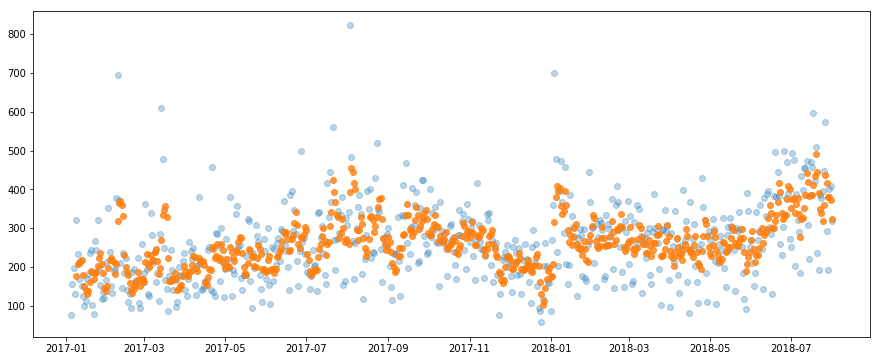

In [257]:
data = df.set_index('date')[['retweets', 'text']].resample('D', how='count').rolling(
    5, on='retweets').mean().reset_index().rename(
    columns={'retweets':'tweets', 'text':'rolling_avg'})

plt.figure(figsize=(15,6))
plt.plot_date(data=data, y='tweets', x='date', xdate=True, alpha=0.3)
plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, alpha=0.8)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


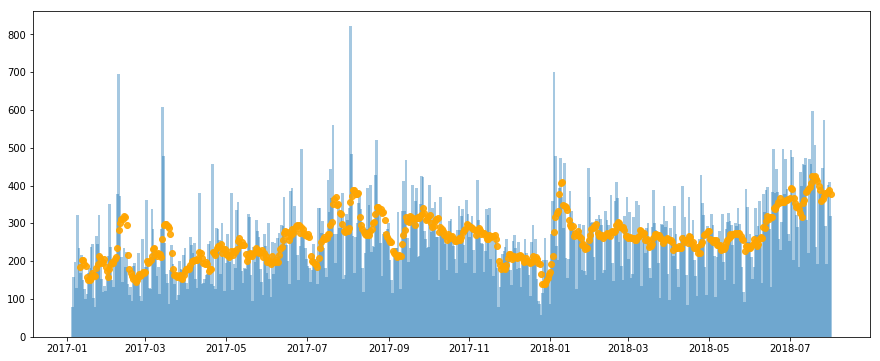

In [267]:
data = df.set_index('date')[['retweets', 'text']].resample('D', how='count').rolling(
    7, on='retweets').mean().reset_index().rename(
    columns={'retweets':'tweets', 'text':'rolling_avg'})

plt.figure(figsize=(15,6))
plt.bar(data=data, height='tweets', x='date',alpha=0.4, width=2)
plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, alpha=0.9, c='orange')

In [268]:
cv = CountVectorizer(stop_words='english')
v_tweets = cv.fit_transform(df.tweet_clean)
gram1 = pd.DataFrame(v_tweets.todense(), columns=cv.get_feature_names()).sum().sort_values(ascending=False)

In [269]:
gram1

train              65242
st                 50053
service            43149
trains             32749
delays             28489
good               27464
av                 21939
time               18584
http               18498
hi                 18167
resumed            17098
running            16956
mta                16607
problems           15621
thank              14733
supervision        14421
morning            14045
station            12635
info               12378
line               11517
travel             11343
earlier            10889
servicealert       10279
location           10162
incident            9619
bound               8602
signal              8376
evening             8343
report              8168
regrets             8127
                   ...  
isl                    1
ishauncomedy           1
ishaggedspicoli        1
isebrand               1
itsmegamze             1
itspriscillah          1
iyzerbvlx5             1
itsthemarsh            1
iyyjluwezo             1


In [270]:
tf = TfidfVectorizer(stop_words='english')
tf_tweets = tf.fit_transform(df.tweet_clean)

In [271]:
tf_tweets

<149091x19290 sparse matrix of type '<class 'numpy.float64'>'
	with 1465282 stored elements in Compressed Sparse Row format>

In [272]:
pd.DataFrame(tf_tweets.todense(), columns=tf.get_feature_names()).sum().sort_values(ascending=False)

train           10562.064629
service          8651.282489
st               7403.024312
resumed          6950.835317
delays           5586.961959
trains           5271.784841
good             4994.597133
av               4098.526512
time             4003.141222
running          3614.717129
location         3555.362649
hi               3526.347067
problems         3438.706095
station          3187.279943
morning          3140.712896
direction        3086.479715
travel           2924.004841
earlier          2869.922995
thank            2802.506196
http             2774.129677
line             2705.754294
incident         2656.328035
mta              2604.500624
supervision      2596.107920
servicealert     2587.815592
tell             2507.170991
regrets          2438.097731
evening          2318.753621
following        2217.328823
signal           2160.831173
                    ...     
aeroportos          0.182457
esta                0.182457
da                  0.182457
nibus         

In [274]:
df.to_csv('more_tweets_plus.csv', index=None)

In [275]:
df.head()

date  retweets  favorites  \
0 2018-08-01 19:52:00         0          0   
1 2018-08-01 19:49:00         0          0   
2 2018-08-01 19:39:00         0          0   
3 2018-08-01 19:38:00         0          0   
4 2018-08-01 19:36:00         0          0   

                                                text mentions hashtags  \
0  Good Evening. We are working to address these ...      NaN      NaN   
1  Good Evening. Can you tell us your location an...      NaN      NaN   
2  Thank you for reporting this information. We w...      NaN      NaN   
3  You're very welcome and I hope you have a grea...      NaN      NaN   
4  Thank you again for reporting this. We will at...      NaN      NaN   

             id                                          permalink  \
0  1.024805e+18  https://twitter.com/NYCTSubway/status/10248050...   
1  1.024804e+18  https://twitter.com/NYCTSubway/status/10248044...   
2  1.024802e+18  https://twitter.com/NYCTSubway/status/10248017...   
3  1.024802e+18  https://twitter.com/NYCTSubway/status/10248015...   
4  1.024801e+18  https://twitter.com/NYCTSubway/status/10248010...   

                                         tweet_clean  polarity  subjectivity  \
0  good evening. we are working to address these ...       0.7         0.600   
1  good evening. can you tell us your location an...       0.7         0.600   
2  thank you for reporting this information. we w...       0.0         0.000   
3  you're very welcome and i hope you have a grea...       0.9         0.875   
4  thank you again for reporting this. we will at...       0.8         0.750   

   sig  log_rt  log_faves  
0  ^JZ     0.0        0.0  
1  ^JZ     0.0        0.0  
2  ^JZ     0.0        0.0  
3  ^JZ     0.0        0.0  
4  ^JZ     0.0        0.0

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


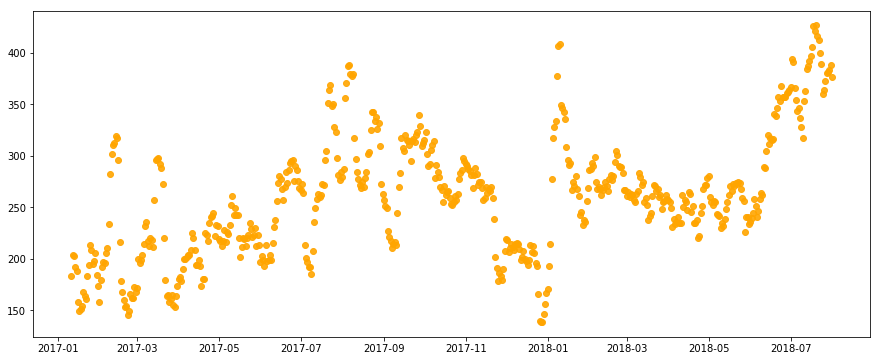

In [393]:
data = df.set_index('date')[['retweets', 'text']].resample('D', how='count').rolling(
    7, on='retweets').mean().reset_index().rename(
    columns={'retweets':'tweets', 'text':'rolling_avg'})

plt.figure(figsize=(15,6))
plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, alpha=0.9, c='orange')

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


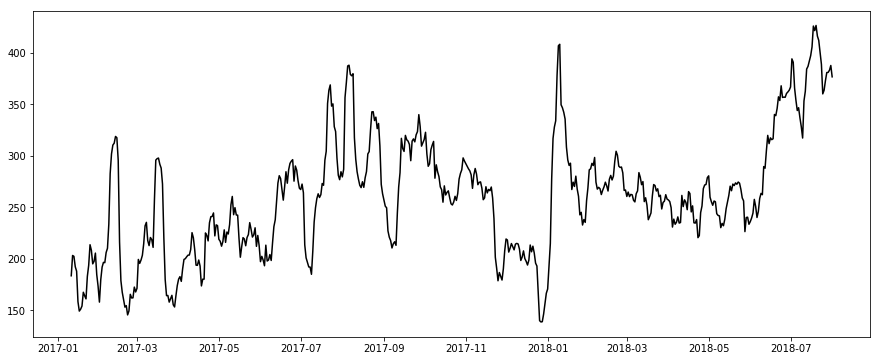

In [292]:
data = df.set_index('date')[['retweets', 'text']].resample('D', how='count').rolling(
    7, on='retweets').mean().reset_index().rename(
    columns={'retweets':'tweets', 'text':'rolling_avg'})

plt.figure(figsize=(15,6))
plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, fmt='k-')

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


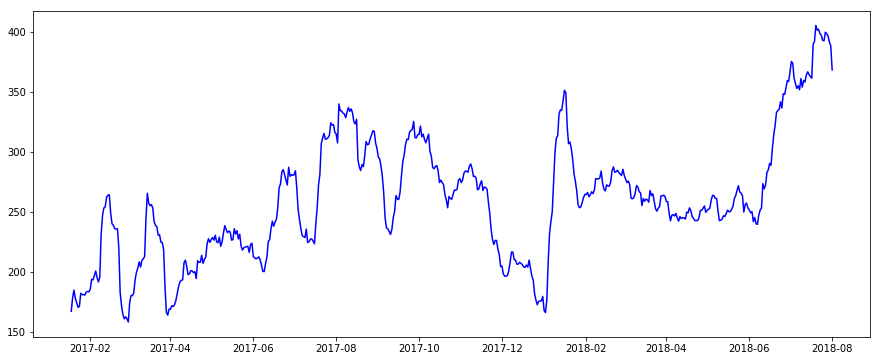

In [376]:
data = df.set_index('date')[['retweets', 'text']].resample('D', how='count').rolling(
    14, on='retweets').mean().reset_index().rename(
    columns={'retweets':'tweets', 'text':'rolling_avg'})

plt.figure(figsize=(15,6))
plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, fmt='b-')

In [294]:
import matplotlib.dates as mdates
import statsmodels.api as sm
from pandas.core import datetools

In [301]:
rolling_7.interpolate().tail()

date  tweets  rolling_avg
569 2018-07-28     292   381.000000
570 2018-07-29     193   381.142857
571 2018-07-30     402   383.285714
572 2018-07-31     410   387.857143
573 2018-08-01     320   376.857143

In [302]:
rolling_7.tail()

date  tweets  rolling_avg
569 2018-07-28     292   381.000000
570 2018-07-29     193   381.142857
571 2018-07-30     402   383.285714
572 2018-07-31     410   387.857143
573 2018-08-01     320   376.857143

In [311]:
rolling_7 = df.set_index('date')[['retweets', 'text']].resample('D').count().rolling(
    7, on='retweets').mean().reset_index().rename(
    columns={'retweets':'tweets', 'text':'rolling_avg'})

In [319]:
rolling_7.dropna()

date  tweets  rolling_avg
6   2017-01-11     169   183.714286
7   2017-01-12     216   203.428571
8   2017-01-13     151   202.571429
9   2017-01-14     126   192.428571
10  2017-01-15     100   188.142857
11  2017-01-16     114   158.571429
12  2017-01-17     170   149.428571
13  2017-01-18     182   151.285714
14  2017-01-19     237   154.285714
15  2017-01-20     245   167.714286
16  2017-01-21     102   164.285714
17  2017-01-22      79   161.285714
18  2017-01-23     267   183.142857
19  2017-01-24     245   193.857143
20  2017-01-25     322   213.857143
21  2017-01-26     199   208.428571
22  2017-01-27     153   195.285714
23  2017-01-28     119   197.714286
24  2017-01-29     135   205.714286
25  2017-01-30     121   184.857143
26  2017-01-31     166   173.571429
27  2017-02-01     214   158.142857
28  2017-02-02     352   180.000000
29  2017-02-03     238   192.142857
30  2017-02-04     151   196.714286
31  2017-02-05     133   196.428571
32  2017-02-06     190   206.285714
33  2017-02-07     195   210.428571
34  2017-02-08     378   233.857143
35  2017-02-09     695   282.857143
..         ...     ...          ...
544 2018-07-03     475   391.000000
545 2018-07-04     204   366.000000
546 2018-07-05     388   354.142857
547 2018-07-06     322   344.142857
548 2018-07-07     291   346.857143
549 2018-07-08     184   337.000000
550 2018-07-09     435   328.428571
551 2018-07-10     398   317.428571
552 2018-07-11     456   353.428571
553 2018-07-12     454   362.857143
554 2018-07-13     473   384.428571
555 2018-07-14     309   387.000000
556 2018-07-15     221   392.285714
557 2018-07-16     471   397.428571
558 2018-07-17     457   405.857143
559 2018-07-18     598   426.142857
560 2018-07-19     423   421.714286
561 2018-07-20     508   426.714286
562 2018-07-21     237   416.428571
563 2018-07-22     192   412.285714
564 2018-07-23     387   400.285714
565 2018-07-24     378   389.000000
566 2018-07-25     397   360.285714
567 2018-07-26     448   363.857143
568 2018-07-27     573   373.142857
569 2018-07-28     292   381.000000
570 2018-07-29     193   381.142857
571 2018-07-30     402   383.285714
572 2018-07-31     410   387.857143
573 2018-08-01     320   376.857143

[568 rows x 3 columns]

In [329]:
res = sm.tsa.seasonal_decompose(rolling_7.dropna().set_index('date')['rolling_avg'], model='additive')

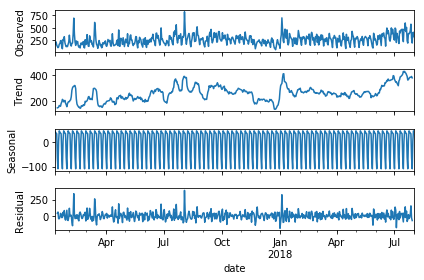

In [357]:
sm.tsa.seasonal_decompose(rolling_7.dropna().set_index('date')['tweets']).plot();

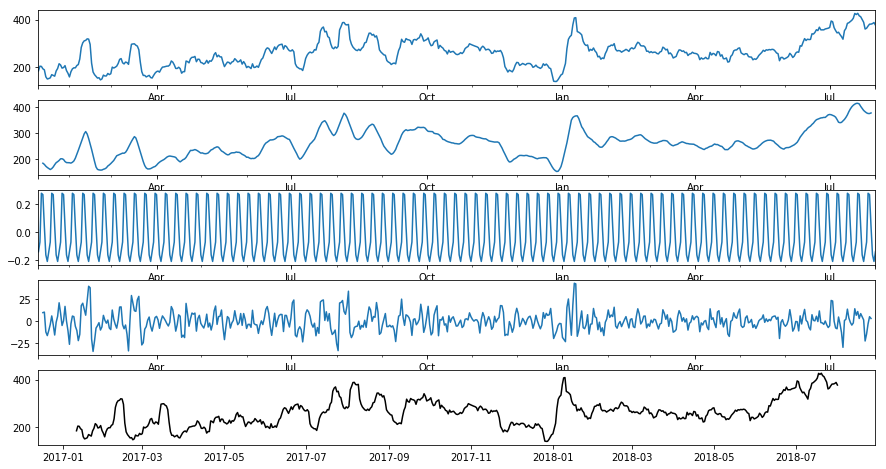

In [360]:
fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,8));
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)
ax5 = plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, fmt='k-')

In [361]:
res2 = sm.tsa.seasonal_decompose(rolling_7.dropna().set_index('date')['tweets'], model='additive')

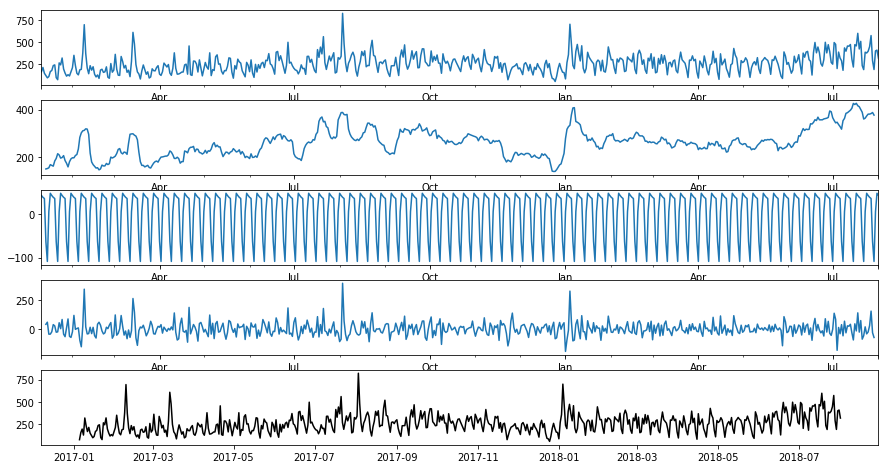

In [367]:
fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(5,1, figsize=(15,8));
res2.observed.plot(ax=ax1)
res2.trend.plot(ax=ax2)
res2.seasonal.plot(ax=ax3)
res2.resid.plot(ax=ax4)
ax5 = plt.plot_date(data=data, y='tweets', x='date', xdate=True, fmt='k-')

In [379]:
data.sort_values("tweets", ascending=False)

date  tweets  rolling_avg
210 2017-08-03     822   340.214286
364 2018-01-04     700   208.428571
35  2017-02-09     695   231.428571
68  2017-03-14     609   244.928571
559 2018-07-18     598   389.785714
568 2018-07-27     573   399.928571
197 2017-07-21     561   307.142857
230 2017-08-23     520   308.928571
561 2018-07-20     508   405.571429
537 2018-06-26     498   348.714286
173 2017-06-27     498   287.500000
530 2018-06-19     496   314.214286
543 2018-07-02     495   375.571429
211 2017-08-04     483   334.642857
365 2018-01-05     479   231.785714
69  2017-03-15     478   265.785714
544 2018-07-03     475   374.071429
369 2018-01-09     474   299.928571
554 2018-07-13     473   364.285714
557 2018-07-16     471   362.928571
539 2018-06-28     471   353.428571
252 2017-09-14     469   263.928571
372 2018-01-12     459   331.928571
106 2017-04-21     457   209.642857
558 2018-07-17     457   361.642857
552 2018-07-11     456   359.714286
553 2018-07-12     454   358.500000
567 2018-07-26     448   392.785714
390 2018-01-30     446   262.285714
532 2018-06-21     445   333.071429
..         ...     ...          ...
242 2017-09-04     115   279.428571
11  2017-01-16     114          NaN
66  2017-03-12     113   211.214286
144 2017-05-29     111   216.571429
80  2017-03-26     110   224.857143
479 2018-04-29     110   255.285714
43  2017-02-17     110   240.500000
472 2018-04-22     107   243.071429
51  2017-02-25     107   164.928571
346 2017-12-17     107   204.357143
486 2018-05-06     105   263.928571
150 2017-06-04     105   211.857143
444 2018-03-25     103   250.928571
16  2017-01-21     102   178.357143
10  2017-01-15     100          NaN
79  2017-03-25      98   225.071429
451 2018-04-01      97   258.928571
136 2017-05-21      96   227.785714
52  2017-02-26      95   161.285714
45  2017-02-19      94   236.357143
352 2017-12-23      94   196.857143
508 2018-05-28      93   250.214286
361 2018-01-01      88   168.285714
73  2017-03-19      87   253.571429
353 2017-12-24      87   193.642857
465 2018-04-15      83   244.357143
17  2017-01-22      79   174.714286
322 2017-11-23      78   235.928571
0   2017-01-05      78          NaN
354 2017-12-25      59   182.285714

[574 rows x 3 columns]

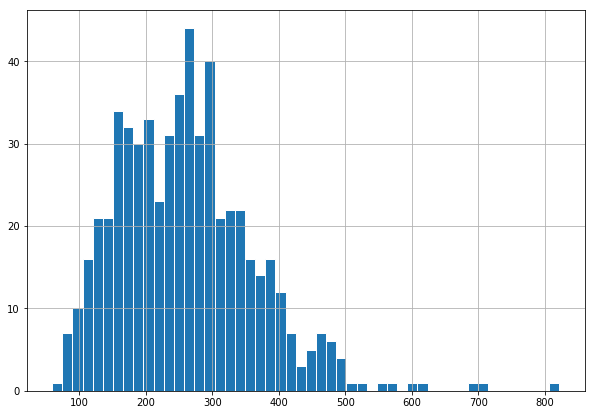

In [383]:
plt.figure(figsize=(10,7))
data.tweets.hist(bins=50, ec='w')

In [384]:
data.describe().T

count        mean         std         min         25%  \
tweets       574.0  259.740418  103.033402   59.000000  182.000000   
rolling_avg  561.0  259.556150   51.438462  158.642857  225.071429   

                    50%         75%         max  
tweets       253.000000  318.000000  822.000000  
rolling_avg  256.357143  284.785714  405.571429

In [394]:
data.shape

(574, 3)

In [442]:
data['level'] = pd.qcut(data.tweets, 5, labels=range(5))

In [443]:
data['level_num'] = pd.to_numeric(data.level.map(lambda x: int((x+1)*75)))

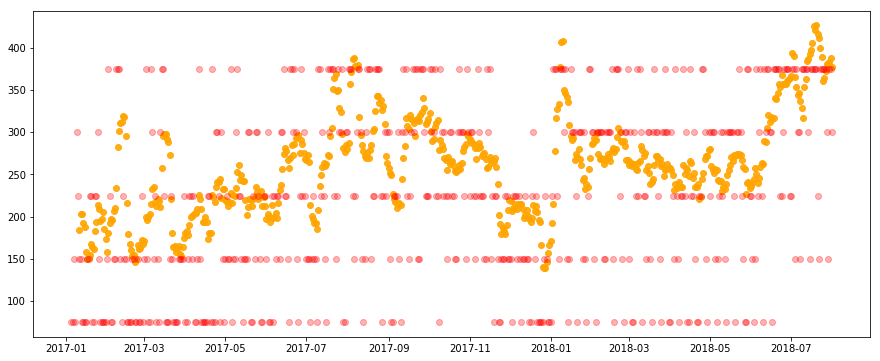

In [444]:
data = data

plt.figure(figsize=(15,6))
plt.plot_date(data=data, y='rolling_avg', x='date', xdate=True, alpha=0.9, c='orange')
plt.plot_date(data=data, y='level_num', x='date', xdate=True, alpha=0.3, c='red')

In [447]:
data.level_num.value_counts()

150    116
375    115
75     115
300    114
225    114
Name: level, dtype: int64

In [451]:
data[data['level'] == 4].sort_values('tweets', ascending=False)

date  tweets  rolling_avg level  level_num
210 2017-08-03     822   356.714286     4        375
364 2018-01-04     700   277.714286     4        375
35  2017-02-09     695   282.857143     4        375
68  2017-03-14     609   257.714286     4        375
559 2018-07-18     598   426.142857     4        375
568 2018-07-27     573   373.142857     4        375
197 2017-07-21     561   351.000000     4        375
230 2017-08-23     520   342.857143     4        375
561 2018-07-20     508   426.714286     4        375
537 2018-06-26     498   357.142857     4        375
173 2017-06-27     498   290.285714     4        375
530 2018-06-19     496   340.285714     4        375
543 2018-07-02     495   394.285714     4        375
211 2017-08-04     483   371.285714     4        375
365 2018-01-05     479   317.000000     4        375
69  2017-03-15     478   296.000000     4        375
544 2018-07-03     475   391.000000     4        375
369 2018-01-09     474   407.000000     4        375
554 2018-07-13     473   384.428571     4        375
557 2018-07-16     471   397.428571     4        375
539 2018-06-28     471   360.714286     4        375
252 2017-09-14     469   317.142857     4        375
372 2018-01-12     459   346.857143     4        375
558 2018-07-17     457   405.857143     4        375
106 2017-04-21     457   225.285714     4        375
552 2018-07-11     456   353.428571     4        375
553 2018-07-12     454   362.857143     4        375
567 2018-07-26     448   363.857143     4        375
390 2018-01-30     446   256.571429     4        375
532 2018-06-21     445   346.142857     4        375
..         ...     ...          ...   ...        ...
410 2018-02-19     360   280.428571     4        375
363 2018-01-03     359   215.000000     4        375
519 2018-06-08     359   258.714286     4        375
426 2018-03-07     359   255.428571     4        375
259 2017-09-21     359   295.428571     4        375
125 2017-05-10     357   252.714286     4        375
274 2017-10-06     356   306.142857     4        375
476 2018-04-26     355   251.428571     4        375
216 2017-08-09     355   379.857143     4        375
28  2017-02-02     352   180.000000     4        375
263 2017-09-25     352   320.571429     4        375
428 2018-03-09     350   266.142857     4        375
231 2017-08-24     350   343.000000     4        375
224 2017-08-17     349   269.571429     4        375
168 2017-06-22     347   286.571429     4        375
447 2018-03-28     346   254.857143     4        375
292 2017-10-24     346   260.857143     4        375
455 2018-04-05     345   238.714286     4        375
201 2017-07-25     344   350.571429     4        375
510 2018-05-30     344   240.571429     4        375
516 2018-06-05     342   251.000000     4        375
503 2018-05-23     342   274.714286     4        375
232 2017-08-25     342   334.428571     4        375
209 2017-08-02     341   287.142857     4        375
187 2017-07-11     341   235.857143     4        375
272 2017-10-04     340   290.000000     4        375
186 2017-07-10     340   207.714286     4        375
315 2017-11-16     340   270.142857     4        375
60  2017-03-06     339   214.857143     4        375
313 2017-11-14     338   257.571429     4        375

[115 rows x 5 columns]

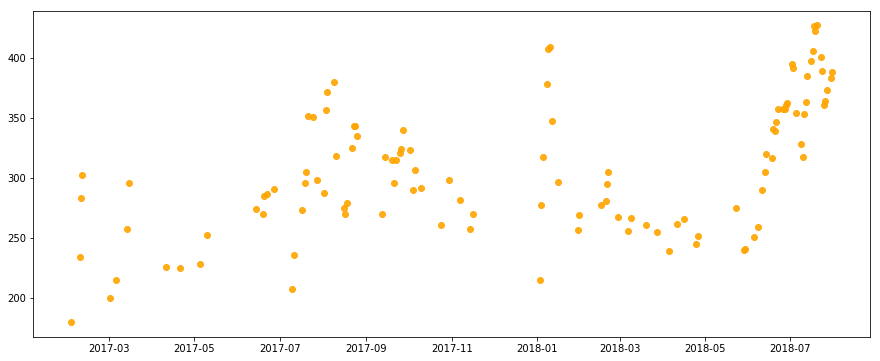

In [452]:
df = data[data['level'] == 4]

plt.figure(figsize=(15,6))
plt.plot_date(data=df, y='rolling_avg', x='date', xdate=True, alpha=0.9, c='orange')
# plt.plot_date(data=df, y='level_num', x='date', xdate=True, alpha=0.3, c='red')

In [454]:
df.date.value_counts()

2018-06-11    1
2017-06-22    1
2017-04-21    1
2018-04-11    1
2018-01-08    1
2018-07-20    1
2018-06-19    1
2017-11-07    1
2017-07-11    1
2018-07-27    1
2017-05-05    1
2017-11-14    1
2018-04-25    1
2017-04-11    1
2018-07-03    1
2018-02-28    1
2017-02-08    1
2018-06-26    1
2017-07-20    1
2017-06-19    1
2018-07-10    1
2017-09-27    1
2018-01-05    1
2018-07-17    1
2017-10-04    1
2017-08-03    1
2018-01-12    1
2018-07-13    1
2017-08-23    1
2018-05-23    1
             ..
2018-02-20    1
2018-07-25    1
2018-02-19    1
2017-08-04    1
2017-07-10    1
2018-07-31    1
2018-05-30    1
2017-08-17    1
2017-07-17    1
2017-03-15    1
2017-08-24    1
2018-06-13    1
2018-01-09    1
2018-06-20    1
2018-02-16    1
2018-01-16    1
2018-06-27    1
2018-04-26    1
2017-02-02    1
2017-09-21    1
2017-02-09    1
2017-07-21    1
2017-06-20    1
2018-07-11    1
2018-03-09    1
2017-07-28    1
2017-06-27    1
2018-07-18    1
2018-04-16    1
2017-10-30    1
Name: date, Length: 115,